<a href="https://colab.research.google.com/github/simranwarraich/data-wrangling-with-pandas/blob/main/A_Pandas_Project_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup: Importing pandas and Loading the Data
First, import pandas and load the dataset into a DataFrame:

In [21]:
import pandas as pd

# Load the data into a pandas DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)


# Cleaning Dirty Data: Handling Missing Values and Outliers
Clean the data by handling missing values and removing outliers:

In [22]:
# Handle missing values
df = df.dropna()

# Remove outliers (e.g., negative quantities and prices)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]


In [23]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# Data Transformation: Reshaping and Formatting for Analysis
Perform data transformations such as creating new columns and formatting data:

In [28]:
# Create a 'TotalPrice' column by multiplying quantity and unit price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Format the 'InvoiceDate' column as datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Exploring the Data: Descriptive Statistics and Visualization
Explore the data using descriptive statistics and visualization:

            Quantity                    InvoiceDate      UnitPrice  \
count  397884.000000                         397884  397884.000000   
mean       12.988238  2011-07-10 23:41:23.511023360       3.116488   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       179.331775                            NaN      22.097877   

          CustomerID     TotalPrice  
count  397884.000000  397884.000000  
mean    15294.423453      22.397000  
min     12346.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.141560     309.071041  


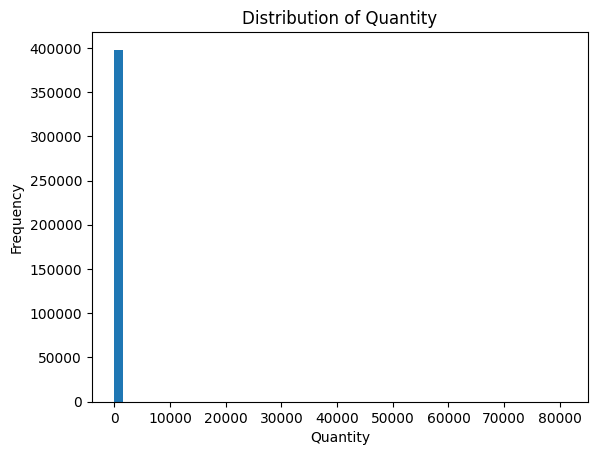

In [25]:
# Get descriptive statistics of numerical columns
print(df.describe())

# Visualize the distribution of 'Quantity' and 'UnitPrice'
import matplotlib.pyplot as plt
plt.hist(df['Quantity'], bins = 50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()


# Finding Patterns: Grouping and Aggregation Techniques
Find patterns in the data using grouping and aggregation:

In [31]:
# Group the data by 'Country' and calculate total sales for each country
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort the countries by total sales in descending order
country_sales = country_sales.sort_values(by='TotalPrice', ascending=False)

# Display the top 5 countries by total sales
print(country_sales.head())

           Country   TotalPrice
35  United Kingdom  7308391.554
23     Netherlands   285446.340
10            EIRE   265545.900
14         Germany   228867.140
13          France   209024.050


# Beyond the Basics: Advanced Techniques for Powerful Analysis
For more advanced analysis, you can use techniques like time series analysis, clustering, or predictive modeling. Here's an example of using time series analysis to analyze sales trends:

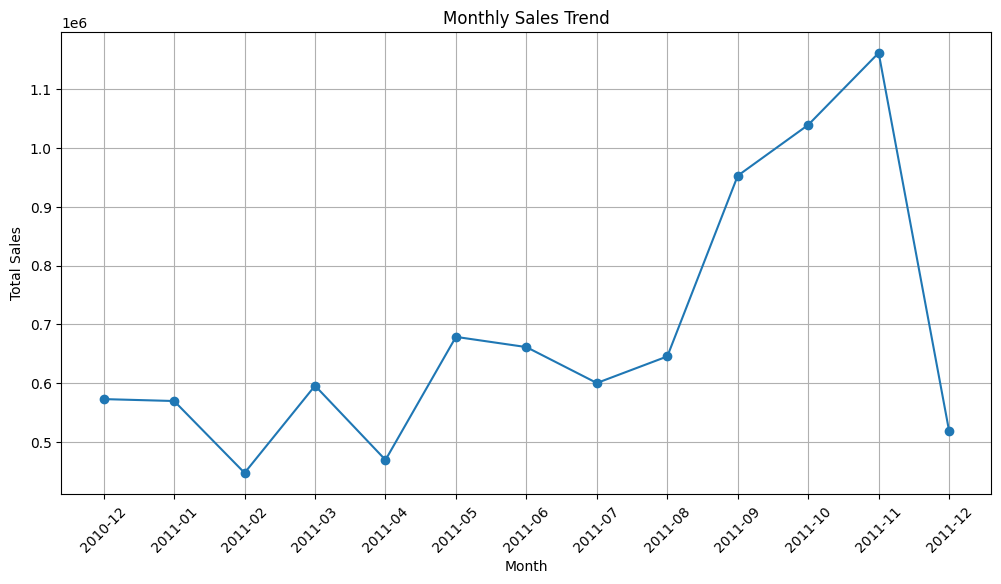

In [27]:
# Group the data by month and calculate total sales for each month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

# Visualize the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
